1. How many unique customers are in the dataset? // **ANSWER: 5191**

In [3]:
import pandas as pd

# the following code was run on PyCharm where it printed out "5191" instead of throwing an error

customer_data = pd.read_json('dim_customer.json')
unique_customer_ids = (pd.unique(customer_data['id']) != "")

print(unique_customer_ids.sum())

/var/folders/bn/rm3rchsx69z9q28q_730w3x40000gn/T/ipykernel_6994/2959506372.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  unique_customer_ids = (pd.unique(customer_data['id']) != "")


AttributeError: 'bool' object has no attribute 'sum'

2. What are the different categories of products available? How many unique categories are there? //  **ANSWER: The categories are as follows: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir. There are 8 categories in total.**

In [3]:
import pandas as pd

customer_data = pd.read_json('dim_customer.json')
product_invoice_data = pd.read_csv('fct_invoice.csv')

product_category_list = pd.unique(product_invoice_data['category'])
num_product_categories = (product_category_list != "").sum()

print(product_category_list, num_product_categories)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir'] 8


3. Which payment method is the most popular? How many times was it used? // **ANSWER: Cash is the most popular with 44,447 uses out of 99,457**

In [4]:
payment_method_list = product_invoice_data['payment_method'].value_counts()
print(payment_method_list)

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


MEDIUM 1. What are the three most popular categories, by total sales? // **ANSWER: Clothing, Cosmetics, and Food & Beverage**

In [8]:
categ_quant_count = product_invoice_data[['quantity', 'category']].value_counts().reset_index(name='count')
categ_quant_count['total_sales'] = categ_quant_count['quantity'] * categ_quant_count['count']
output_df = categ_quant_count[['category', 'total_sales']]
print(output_df.groupby('category').sum())

                 total_sales
category                    
Books                  14982
Clothing              103558
Cosmetics              45465
Food & Beverage        44277
Shoes                  30217
Souvenir               14871
Technology             15021
Toys                   30321


2. What are the total sales attributed to customers over the age of 45? // **ANSWER: 100439**

In [17]:
merge_pd = pd.merge(customer_data, product_invoice_data, left_on='id', right_on='customer_id', how='left')

filtered_df = merge_pd[merge_pd['age'] >= 45]
output = filtered_df[['quantity']].sum()
print(output)

quantity    100439
dtype: int64


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

      Month-Year  quantity
0        08/2022         5
1        12/2021         3
2        11/2021         1
3        05/2021         5
4        10/2021         4
...          ...       ...
99452    09/2022         5
99453    09/2021         2
99454    03/2021         2
99455    03/2021         4
99456    10/2022         3

[99457 rows x 2 columns]


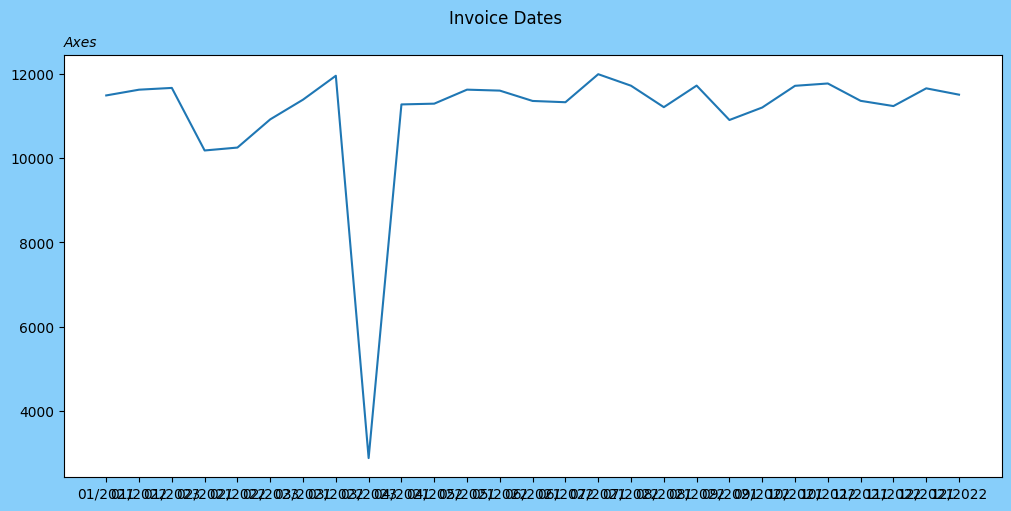

In [36]:
import datetime

product_invoice_data['Date'] = pd.to_datetime(product_invoice_data.invoice_date, format='%d/%m/%Y')
product_invoice_data['Month-Year'] = product_invoice_data['Date'].dt.strftime('%m/%Y')
print(product_invoice_data[['Month-Year', 'quantity']])

import requests
import matplotlib.pyplot as plt

filtered_data = product_invoice_data[['Month-Year', 'quantity']]
date_points = filtered_data.groupby('Month-Year').sum()



fig = plt.figure(figsize=(10, 5), facecolor='lightskyblue', layout='constrained')
fig.suptitle('Invoice Dates')
ax = fig.add_subplot()
ax.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')
ax.plot(date_points)


HARD 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [88]:
merge_pd = pd.merge(customer_data, product_invoice_data, left_on='id', right_on='customer_id', how='left')
sorted_df = merge_pd.groupby(['category', pd.cut(merge_pd['age'], [10, 20, 30, 40, 50, 60, 70, 80, 90])]).sum()
sorted2_df = sorted_df[['quantity']]

pivot_table = pd.pivot_table(sorted2_df, values='quantity', index='category', columns='age', aggfunc=sum, fill_value=0)
print(pivot_table)


pd.set_option('display.max_rows', None)


age              (10, 20]  (20, 30]  (30, 40]  (40, 50]  (50, 60]  (60, 70]  \
category                                                                      
Books                 351      1443      1522      1471      1438      1354   
Clothing             2722      9233     10391      9996      9802      9080   
Cosmetics            1178      3999      4865      4382      4214      3990   
Food & Beverage      1067      3929      4651      4443      4106      3968   
Shoes                 638      2810      3181      3035      2832      2471   
Souvenir              458      1267      1487      1488      1352      1215   
Technology            438      1313      1607      1518      1222      1386   
Toys                  748      2841      3259      2891      2747      2593   

age              (70, 80]  (80, 90]  
category                             
Books                1031       409  
Clothing             7154      3401  
Cosmetics            2884      1470  
Food & Beverage    